## Balanço em Reator Químico 

## <center>UNIVERSIDADE ESTADUAL DE SANTA CRUZ - UESC<center> <center>DEPARTAMENTO DE ENGENHARIAS E COMPUTAÇÃO - DEC </center>
#### <center>CURSO DE ENGENHARIA QUÍMICA</center>

**CET1012** - Modelagem, Simulação e Otimização de Processos Químicos.

**Tema**: Balanço em Reatores Químicos utilizando Cálculos Matriciais.

**Professor**: Prof. Dr E.R.Edwards

**Assunto**: Sistema de Reatores (Engenharia Química/Bioengenharia)

**Fonte**: Steven C. Chapra e Raymond P. Canale, "Métodos Numéricos para Engenharia", $7^a$ Edição. Editora: MacGraw Hill. página 283.


### Fundamentação.

A conservação de massa é uma das principais organizações na Engenharia Química. Ela contabiliza o balanço de massa que entra em um volume de controle pelo balanço de massa que sai do volume de controle. Caso haja reações químicas esses dados deverão ser contabilizados como acumulo no reator.

$$Acumulo = Entrada - saída$$

Sendo assim, o balanço de massa representa um exercício de contabilidade para a substância específica que esta sendo
modelada. Pelo próprio balanço, se as entradas forem maiores do que as saídas a massa da substância dentro do volume de
controle cresce. Se as saídas forem iguais as entradas o acumulo é igual a zero e a massa permanece constante.


Para condições estáveis ou estacionárias o acumulo será nulo e a equação torna-se.

$$entrada=saída$$


In [2]:
# pip install ipython -> Já deve estar instalado.
from IPython.display import Image, display


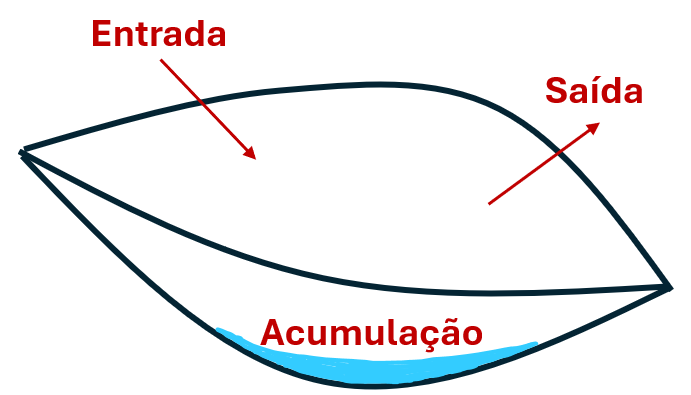

In [4]:
# Colocar figura.
display(Image(filename='acumulacao.png', width=400))

Podemos usar a conservação da massa para determinar as concentrações estacionárias de um sistema de reatores

#### Aplicação:

Vamos analisar o reator abaixo e fazermos um balanço de massa no processo.

Exercício<br>

Calcule a concentração $c_3$ na saída do reator sendo dadas as informações da tabela ao lado.


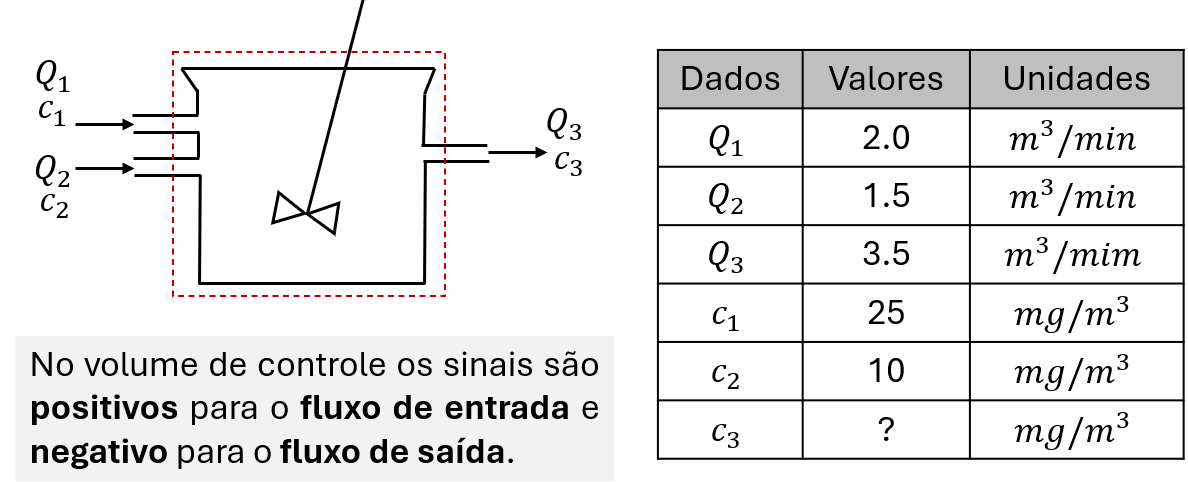

In [5]:
display(Image(filename='reator1.png', width=500))

$$Q_1.c_1 + Q_2.c_2 =  Q_3.c_3$$

$$ c_3 = \frac{Q_1.c_1 + Q_2.c_2}{Q_3}$$


In [9]:
# Exercitando 

Q1, Q2, Q3, c1, c2 = 2.0, 1.5, 3.5, 25, 10


c3 = float(((Q1 * c1) + (Q2*c2))/ Q3)

print('O resultado de c3 = {:.2f}'.format(c3), 'mg/m²')

O resultado de c3 = 18.57 mg/m²


#### Aplicação Industrial - Caso 1.

Este tipo de cálculo é de grande utilidade para Engenharia Química e Petroquímica em que deve ser projetado um reator contendo misturas <br>com concentrações específicas. Nesse exercício foi usado **álgebra** para determinar a concentração de um único reator usando o conhecimento <br> de balanços de massa visto em assuntos anteriores. Dessa forma, fica mais fácil a utilização de computador para a realização desse tipo de cálculo.


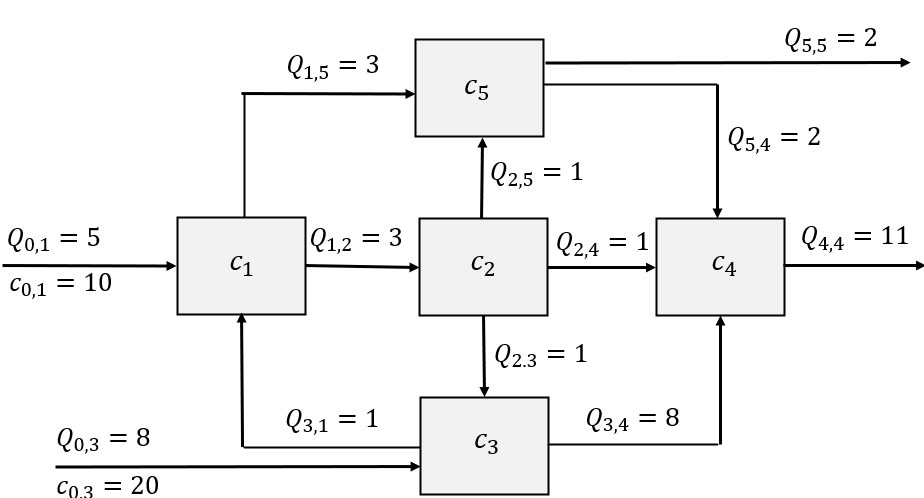

In [10]:
display(Image(filename='reator2.png', width=500))

#### Informações:
1. Estabelecer um volume de controle em cada reator.
2. Faça um balanço de massa em cada reator (entrada de fluxo positivo, saída de fluxo negativo).
3. Serão 5 equações e 5 incógitas ($c_1$, $c_2$, $c_3$, $c_4$, $c_5$)
4. Monte a Matriz: $Ax=b$
6. Cálcule a matriz inversa $A$.
7. Cálcule a incógnita $x$ - coloque os valores de saída separados ($c_1$, $c_2$, $c_3$, $c_4$, $c_5$)<br>
$c_1 = x[0,0]$ <br>
$c_2 = x[1,0]$ <br>
$c_3 = x[2,0]$ <br>
$c_4 = x[3,0]$ <br>
$c_5 = x[4,0]$ <br>
8. Confira seus cálculos substituindo os valores nas equações.


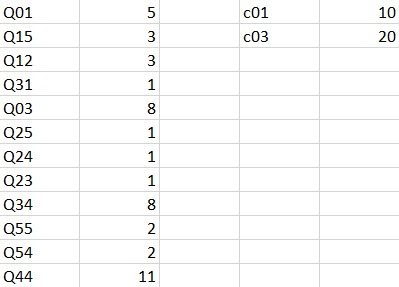

In [13]:
display(Image(filename='tabela_excel.png', width=500))

In [25]:
# Determinando valores

Q01, Q15, Q12, Q31 = 5, 3, 3, 1

Q25, Q24, Q23, Q03 = 1, 1, 1, 8

Q34, Q55, Q54, Q44 = 8, 2, 2, 11

c01, c03 = 10, 20



## Balanço de massa do c1

 Q01c01 = 50

50 + Q31c3 = Q15c1 + Q12c1

50 + c3 = 2c1 + 3c1

-6c1 + c3 = - 50 

6c1 - c3 = 50   # Equação 1

## Balanço de massa do c2

Q12c1 = Q25c2 + Q24c2 + Q23c2

3c1 = 1c2 + 1c2 + 1c2

3c1 = 3c2

3c1 - 3c2 = 0 # Equação 2

## Balanço de massa do c3

Q03C03 = 160

160 + c2Q23 = Q31c3 + Q34C3

160 + 1c2 = 1c3 + 8c3 

c2 - 9c3 = -160 # Equação 3

## Balanço de massa do c4

1c2 + 8c3 + 2c5 = c4 11

c2 + 8c3 - 11c4 + 2c5 = 0 # Equação 4

## Balanço de massa do c5

3c1 + c2 = 2c5 + 2c5 

3c1 + c2 - 4c5 = 0  # Equação 5

Montando a matriz 
6c1 - c3 = 50
3c1 - 3c2 = 0 
c2 - 9c3 = -160
c2 + 8c3 - 11c4 + 2c5 = 0
3c1 + c2 - 4c5 = 0 

In [26]:
a11, a12, a13, a14, a15 = 6, 0, -1, 0, 0
a21, a22, a23, a24, a25 = 3, -3, 0, 0, 0
a31, a32, a33, a34, a35 = 0, 1, -9, 0, 0
a41, a42, a43, a44, a45 = 0, 1, 8, -11, 2
a51, a52, a53, a54, a55 = 3, 1, 0, 0, -4 

In [27]:
import numpy as np
from scipy import sparse
from scipy.sparse import csr_matrix 

In [28]:
# Declarando as arrays. 

row = np.array([0, 0, 1, 1, 2, 2, 3, 3, 3, 3, 4, 4, 4])
col = np.array([0, 2, 0, 1, 1, 2, 1, 2, 3, 4, 0, 1, 4])
data = np.array([6, -1, 3, -3, 1, -9, 1, 8, -11, 2, 3, 1, -4])

In [29]:
A_coord = sparse.coo_matrix((data, (row, col)), dtype= float)

print(A_coord)

  (0, 0)	6.0
  (0, 2)	-1.0
  (1, 0)	3.0
  (1, 1)	-3.0
  (2, 1)	1.0
  (2, 2)	-9.0
  (3, 1)	1.0
  (3, 2)	8.0
  (3, 3)	-11.0
  (3, 4)	2.0
  (4, 0)	3.0
  (4, 1)	1.0
  (4, 4)	-4.0


In [30]:
A = sparse.coo_matrix((data, (row, col)), dtype= float).toarray()
print(A)

[[  6.   0.  -1.   0.   0.]
 [  3.  -3.   0.   0.   0.]
 [  0.   1.  -9.   0.   0.]
 [  0.   1.   8. -11.   2.]
 [  3.   1.   0.   0.  -4.]]


In [31]:
A_inv = np.linalg.inv(A)
print(A_inv)

[[ 0.16981132 -0.00628931 -0.01886792  0.          0.        ]
 [ 0.16981132 -0.33962264 -0.01886792 -0.         -0.        ]
 [ 0.01886792 -0.03773585 -0.11320755 -0.         -0.        ]
 [ 0.06003431 -0.07461407 -0.08747856 -0.09090909 -0.04545455]
 [ 0.16981132 -0.08962264 -0.01886792 -0.         -0.25      ]]


In [32]:
# Cálculo do veto b.

b1, b2, b3, b4, b5 = 50, 0, -160, 0, 0

b = np.array([b1, b2, b3, b4, b5])

In [33]:
# Cálculo dos incógnitas. 

x = A_inv.dot(b)

c1 = x[0]
c2 = x[1]
c3 = x[2]
c4 = x[3]
c5 = x[4]

In [34]:
def line():
    print('-'*50)

line()
print('     RESULTADOS DAS CONCENTRAÇÕES')
line()
print('O resultado de c1 = {:.2f}'.format(c1), 'mg/m³')
print('O resultado de c2 = {:.2f}'.format(c2), 'mg/m³')
print('O resultado de c3 = {:.2f}'.format(c3), 'mg/m³')
print('O resultado de c4 = {:.2f}'.format(c4), 'mg/m³')
print('O resultado de c5 = {:.2f}'.format(c5), 'mg/m³')
line()

--------------------------------------------------
     RESULTADOS DAS CONCENTRAÇÕES
--------------------------------------------------
O resultado de c1 = 11.51 mg/m³
O resultado de c2 = 11.51 mg/m³
O resultado de c3 = 19.06 mg/m³
O resultado de c4 = 17.00 mg/m³
O resultado de c5 = 11.51 mg/m³
--------------------------------------------------


In [40]:
# conferindo os resultados

z1 = 6*c1 - c3

z3 = c2 - 9*c3 

In [42]:
line()
print('   CONFERINDO OS RESULTADOS DAS CONCENTRAÇÕES')
line()
print(f"O resultado de b1 = {b1} e o resultado de z1 = {z1:.2f}")
print(f"O resultado de b3 = {b3} e o resultado de z3 = {z3:.2f}")
line()

--------------------------------------------------
   CONFERINDO OS RESULTADOS DAS CONCENTRAÇÕES
--------------------------------------------------
O resultado de b1 = 50 e o resultado de z1 = 50.00
O resultado de b3 = -160 e o resultado de z3 = -160.00
--------------------------------------------------
